**GROUP 31 PROJECT PROPOSAL (DUE MAR 4)


**Introduction:**
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question


**Preliminary exploratory data analysis:**
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


**Methods:**
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results


**Expected outcomes and significance:**
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?



In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
turkish_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00638/Acoustic%20Features.csv")
colnames(turkish_data) <- c("Class", "RMS_Energy_Mean", "Low_Energy_Mean", "Fluctuation_Mean", "Tempo_Mean", 
                            "MFCC_Mean1", "MFCC_Mean2", "MFCC_Mean3", "MFCC_Mean4", "MFCC_Mean5", "MFCC_Mean6",
                            "MFCC_Mean7", "MFCC_Mean8", "MFCC_Mean9", "MFCC_Mean10", "MFCC_Mean11", "MFCC_Mean12",
                            "MFCC_Mean13", "Roughness_Mean", "Roughness_Slope", "Zero_Crossing_Rate_Mean",
                            "Attack_Time_Mean", "Attack_Time_Slope", "Roll_Off_Mean", "Eventdensity_Mean", "Pulseclarity_Mean",
                            "Brightness_Mean", "Spectralcentroid_Mean", "Spectralspread_Mean", "Spectralskewness_Mean",
                            "Spectralkurtosis_Mean", "Spectralflatness_Mean", "EntropyofSpectrum_Mean", "Chromagram_Mean1",
                            "Chromagram_Mean2", "Chromagram_Mean3", "Chromagram_Mean4", "Chromagram_Mean5", "Chromagram_Mean6",
                            "Chromagram_Mean7", "Chromagram_Mean8", "Chromagram_Mean9", "Chromagram_Mean10", "Chromagram_Mean11",
                            "Chromagram_Mean12", "HarmonicChangeDetectionFunction_Mean", "HarmonicChangeDetectionFunction_Std",
                            "HarmonicChangeDetectionFunction_Slope", "HarmonicChangeDetectionFunction_PeriodFreq", 
                            "HarmonicChangeDetectionFunction_PeriodAmp", "HarmonicChangeDetectionFunction_PeriodEntropy")
head(turkish_data)

Rows: 400 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (50): _RMSenergy_Mean, _Lowenergy_Mean, _Fluctuation_Mean, _Tempo_Mean, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Class,RMSenergy_Mean,Lowenergy_Mean,Fluctuation_Mean,Tempo_Mean,MFCC_Mean1,MFCC_Mean2,MFCC_Mean3,MFCC_Mean4,MFCC_Mean5,⋯,Chromagram_Mean9,Chromagram_Mean10,Chromagram_Mean11,Chromagram_Mean12,HarmonicChangeDetectionFunction_Mean,HarmonicChangeDetectionFunction_Std,HarmonicChangeDetectionFunction_Slope,HarmonicChangeDetectionFunction_PeriodFreq,HarmonicChangeDetectionFunction_PeriodAmp,HarmonicChangeDetectionFunction_PeriodEntropy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,⋯,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,⋯,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,⋯,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,⋯,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,⋯,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
relax,0.137,0.510,7.664,116.044,2.313,-0.082,0.365,0.033,-0.136,⋯,0.064,0.391,0.102,0.000,0.280,0.240,0.355,1.682,0.662,0.958


In [3]:
turkish_split <- initial_split(turkish_data, prop = 0.8, strata = Class)
turkish_training <- training(turkish_split)
turkish_testing <- training(turkish_split)

In [4]:
turkish_table <- turkish_training |>
    select(Class, RMS_Energy_Mean, Low_Energy_Mean, Fluctuation_Mean, Tempo_Mean, Roughness_Mean, Zero_Crossing_Rate_Mean,
           Attack_Time_Mean, Roll_Off_Mean, Event_Density_Mean, Pulse_Clarity_Mean, Brightness_Mean, 
           Spectral_Centroid_Mean, Spectral_Spread_Mean, Spectral_Skewness_Mean, Spectral_Kurtosis_Mean, 
           Spectral_Flatness_Mean, Entropy_of_Spectrum_Mean, Harmonic_Change_Detection_Function_Mean) |>
    group_by(Class) |>
    summarise_all("mean")
turkish_table

Class,RMSenergy_Mean,Lowenergy_Mean,Fluctuation_Mean,Tempo_Mean,Roughness_Mean,ZeroCrossingrate_Mean,AttackTime_Mean,Rolloff_Mean,Eventdensity_Mean,Pulseclarity_Mean,Brightness_Mean,Spectralcentroid_Mean,Spectralspread_Mean,Spectralskewness_Mean,Spectralkurtosis_Mean,Spectralflatness_Mean,EntropyofSpectrum_Mean,HarmonicChangeDetectionFunction_Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
angry,0.1639000,0.5375625,5.681262,129.7200,770.6866,792.0163,0.0227000,5508.392,3.528500,0.243625,0.4289875,2487.060,3064.208,1.844888,6.608375,0.0473750,0.869775,0.2772750
happy,0.1515375,0.5542125,8.038625,120.8899,717.3598,1612.1327,0.0268875,7071.060,3.650212,0.406250,0.5482250,3234.490,3382.894,1.345300,4.287550,0.0554750,0.905250,0.3560250
relax,0.1196875,0.5544750,7.940462,111.0218,363.0877,665.4277,0.0372500,5343.679,1.709975,0.162325,0.3518625,2309.144,3051.549,2.115388,8.447513,0.0453750,0.850825,0.3378500
sad,0.1138625,0.5619500,7.348738,129.7615,344.2520,935.7011,0.0384750,4948.733,2.252375,0.170925,0.4085250,2342.582,2860.396,2.148450,9.895687,0.0468375,0.865475,0.3450625


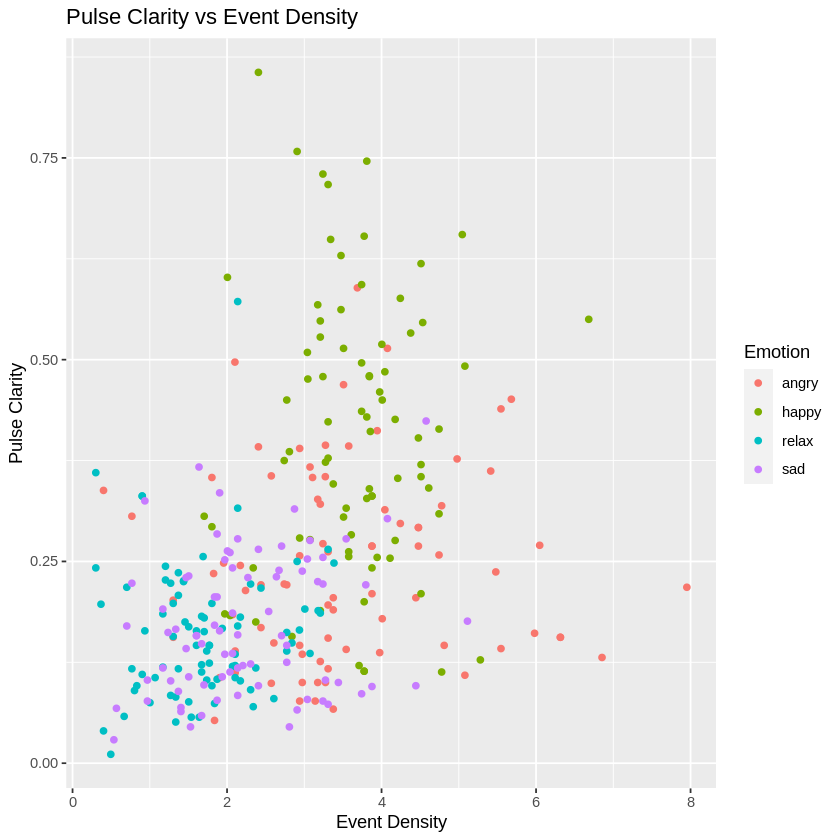

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)

turkish_plot1 <- ggplot(turkish_training, aes(x = Eventdensity_Mean, y = Pulseclarity_Mean, color = Class)) +
    geom_point() + 
    labs(x = "Event Density", y = "Pulse Clarity", color = "Emotion") +
    ggtitle("Pulse Clarity vs Event Density")
turkish_plot1

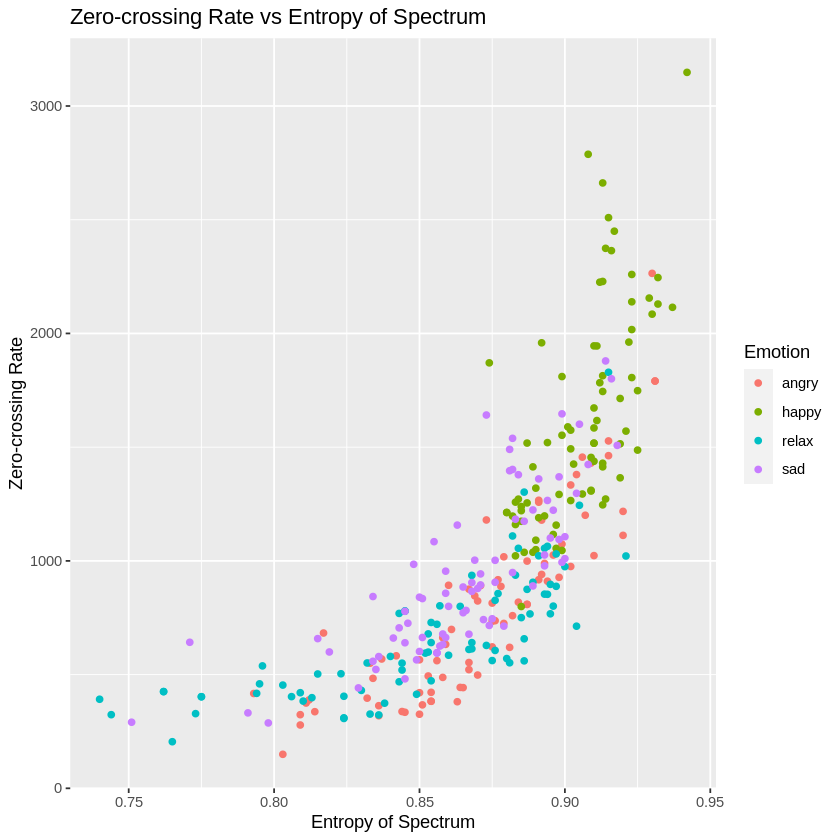

In [13]:
turkish_plot2 <- ggplot(turkish_training, aes(x = EntropyofSpectrum_Mean, y = ZeroCrossingrate_Mean, color = Class)) +
    geom_point() +
    labs(x = "Entropy of Spectrum", y = "Zero-crossing Rate", color = "Emotion") +
    ggtitle("Zero-crossing Rate vs Entropy of Spectrum")
turkish_plot2